<a href="https://colab.research.google.com/github/richod1/Relational_Visualize/blob/main/StockPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [3]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta


end_date=date.today().strftime("%Y-%m-%d")
start_date=(date.today()-timedelta(days=365)).strftime("%Y-%m-%d")
tickers=['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']
data=yf.download(tickers, start=start_date, end=end_date,progress=False)

data=data.reset_index()

# melt data index
melt_data=data.melt(id_vars=['Date'], var_name=['Attribute','Ticker'])

data_pivot=melt_data.pivot_table(index=['Date','Ticker'],columns='Attribute',values='value',aggfunc='first')


stock_data=data_pivot.reset_index()

print(stock_data.head())


Attribute       Date       Ticker    Adj Close        Close         High  \
0         2023-07-10  HDFCBANK.NS  1634.135132  1656.449951  1676.750000   
1         2023-07-10      INFY.NS  1304.812012  1329.150024  1341.900024   
2         2023-07-10  RELIANCE.NS  2515.564209  2524.450195  2543.787109   
3         2023-07-10       TCS.NS  3216.648682  3271.949951  3324.750000   
4         2023-07-11  HDFCBANK.NS  1626.193604  1648.400024  1676.000000   

Attribute          Low         Open      Volume  
0          1649.699951  1661.000000  19199221.0  
1          1319.300049  1336.550049   3940315.0  
2          2469.024170  2481.853760  16620008.0  
3          3265.199951  3324.750000   1407431.0  
4          1645.500000  1663.000000  25335213.0  


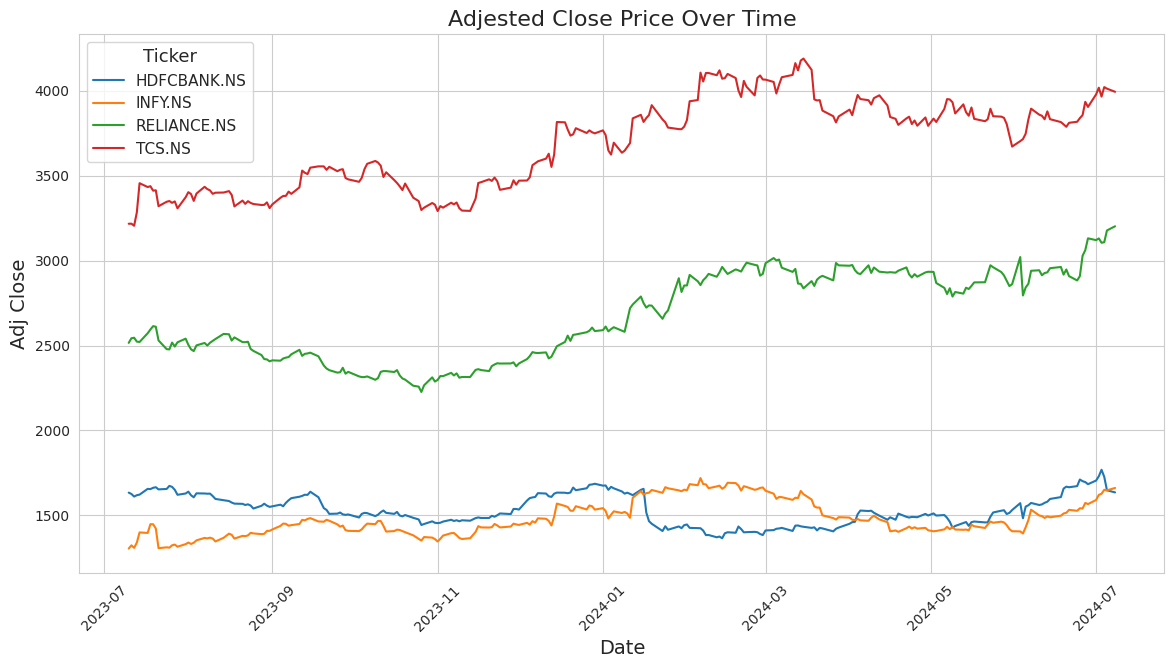

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# get stock data
stock_data['Date']=pd.to_datetime(stock_data['Date'])
# reset index
stock_data.set_index('Date',inplace=True)
stock_data.reset_index(inplace=True)


# plotting
plt.figure(figsize=(14,7))
sns.set_style(style='whitegrid')
sns.lineplot(data=stock_data,x='Date',y='Adj Close',hue='Ticker')
plt.title('Adjested Close Price Over Time',fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Adj Close',fontsize=14)
plt.legend(title="Ticker",title_fontsize='13',fontsize='11')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()